In [1]:
import numpy as np
import pandas as pd
import scipy.io

In [2]:
import csv

file = 'data/XYZcoord1.csv'
XYZ_C_space = pd.read_csv(file,header=None)
natom = XYZ_C_space.shape[0]
ndim = XYZ_C_space.shape[1]

In [3]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
Edge2 = pd.read_csv('Edge2.csv', sep=' ', header=None , names=['Start', 'End', 'Distance'])

In [5]:
Edge2_sorted = Edge2.sort_values(by=['Distance']).reset_index(drop=True)
Edge2_sorted

,Start,End,Distance
0,26,40,0.184379
1,186,194,0.188690
2,1987,1988,0.212916
3,51,81,0.242231
4,1172,1174,0.333840
...,...,...,...
1998995,1635,1991,172.993586
1998996,1635,1994,173.107661
1998997,1635,1974,173.120835
1998998,1635,1973,173.153146


In [6]:
import math
def construct_graph(df, rcut):
    G = nx.Graph()
    natom = len(df.index)
    ndim  = len(df.columns)
    for i in list(range(natom)):
        XYZ_C_i = XYZ_C_space.iloc[i, :].values
        for j in list(range(i+1,natom)):
            XYZ_C_j = XYZ_C_space.iloc[j, :].values
            dist=0.0
            for k in list(range(0,ndim)):
                dist += (XYZ_C_i[k] - XYZ_C_j[k])**2
            dist = math.sqrt(dist)
            
            if dist <= rcut:
                e = ( i, j , dist )
                G.add_weighted_edges_from([(e)])               
    return G

True


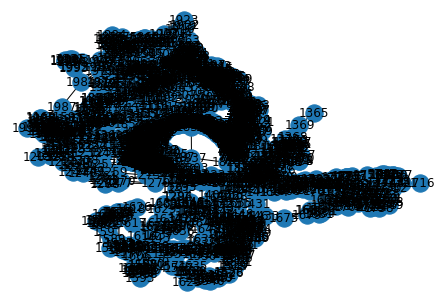

In [7]:
G = construct_graph(XYZ_C_space, 9.0)
nx.draw(G, with_labels=True)
print(nx.is_connected(G))

In [8]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 16.0
modularity: 0.7824840780001537


Community 0
[0, 4, 11, 12, 13, 15, 16, 18, 24, 33, 35, 52, 56, 57, 61, 62, 64, 65, 74, 82, 85, 86, 87, 89, 91, 92, 97, 109, 110, 112, 114, 115, 116, 125, 126, 128, 133, 149, 151, 155, 161, 164, 172, 179, 6, 36, 48, 71, 75, 98, 102, 140, 3, 10, 28, 46, 50, 51, 54, 67, 81, 93, 100, 103, 106, 113, 118, 123, 127, 138, 157, 213, 160, 175, 176, 183, 121, 162, 150, 167, 169, 142, 148, 178, 184, 196, 199, 201, 206, 208, 187, 200, 204, 180, 205, 188, 207, 212, 197, 216, 219, 220, 217, 225, 230, 233, 234, 250, 190, 211, 214, 221, 227, 203, 209, 215, 226, 232, 249, 254, 260, 256, 245, 238, 243, 247, 252, 253, 272, 258, 268, 257, 259, 262, 273, 290, 293, 283, 278, 286, 308, 271, 291, 307, 299, 305, 313, 316, 309, 311, 322, 323, 329, 330, 328, 326, 333, 351]
Community 1
[1, 2, 5, 7, 8, 14, 17, 19, 20, 21, 22, 23, 25, 26, 27, 29, 32, 34, 39, 40, 43, 44, 45, 49, 53, 55, 58, 60, 63, 66, 68, 69, 70, 72, 76, 78, 79, 80, 83, 84, 96, 99, 101, 105, 107, 108, 111, 117, 119, 120, 124, 131, 132, 137, 139, 144

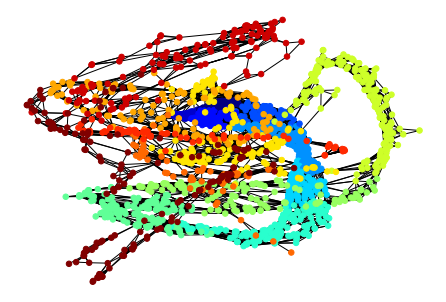

In [9]:
#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

In [10]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C_space),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C_space)) :
        if partition[i] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C_space))  
#set(partition.values())

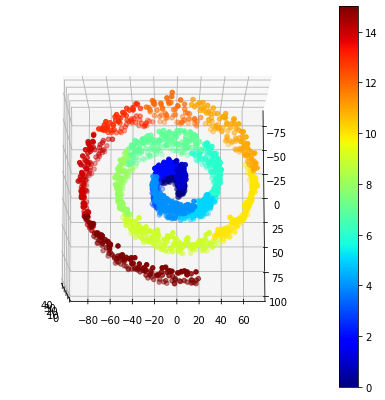

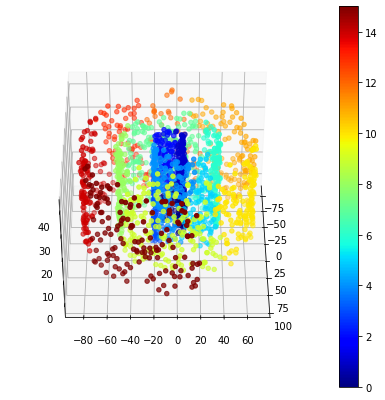

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
z = XYZ_C_space.iloc[:,2]
x = XYZ_C_space.iloc[:,0]
y = XYZ_C_space.iloc[:,1]
c = labelRE
p1 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
fig1.colorbar(p1,ax=ax)
ax.view_init(80, 0)

fig2 = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
z = XYZ_C_space.iloc[:,2]
x = XYZ_C_space.iloc[:,0]
y = XYZ_C_space.iloc[:,1]
c = labelRE
p2 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
fig2.colorbar(p2,ax=ax)
ax.view_init(40, 0)

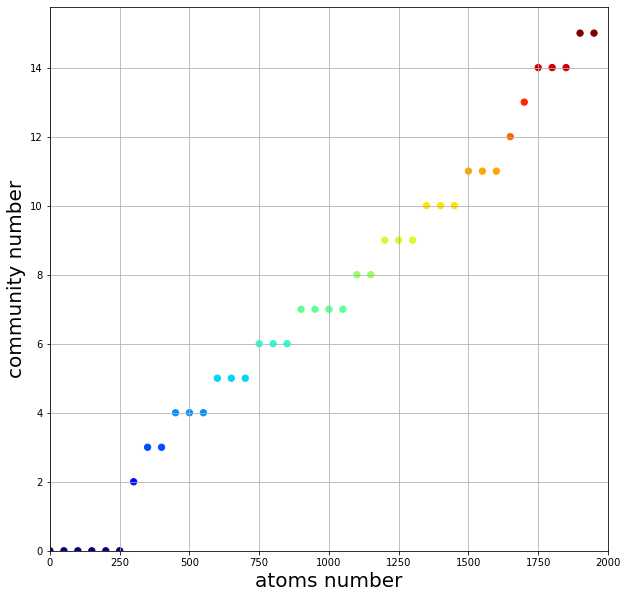

In [12]:
fig1.colorbar(p1,ax=ax)
fig2.colorbar(p2,ax=ax)
dot = []
community = []
clr = []
for j in range(len(XYZ_C_space)):
    if j % 50 == 0: #取40個原子作圖
        community.append(partition[j])
        dot.append(j)
        clr.append(labelRE[j])
plt.figure(figsize=(10,10))
plt.scatter(dot, community, s=40, c =clr, cmap = plt.get_cmap('jet'))
plt.xlim(0,2000)
plt.xlabel("atoms number", fontsize=20)
plt.ylim(0, )
plt.ylabel("community number", fontsize=20)
plt.grid(True)
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=int(size)).fit(XYZ_C_space)

In [14]:
label = np.zeros((len(XYZ_C_space),1))
for j in range(int(size)) :
    for i in range(len(XYZ_C_space)) :
        if kmeans.labels_[i] == j :            
            label[i] =  j
labelK = np.reshape(label, len(XYZ_C_space))   

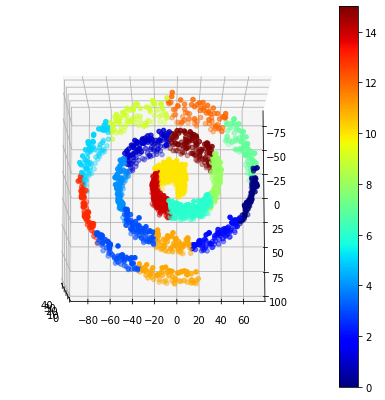

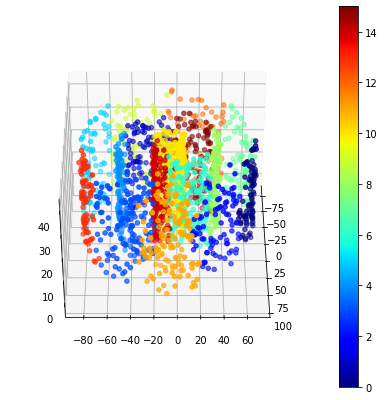

In [15]:
fig3 = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
z = XYZ_C_space.iloc[:,2]
x = XYZ_C_space.iloc[:,0]
y = XYZ_C_space.iloc[:,1]
c = labelK
p3 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
fig3.colorbar(p3,ax=ax)
ax.view_init(80, 0)

fig4 = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
z = XYZ_C_space.iloc[:,2]
x = XYZ_C_space.iloc[:,0]
y = XYZ_C_space.iloc[:,1]
c = labelK
p4 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
fig4.colorbar(p4,ax=ax)
ax.view_init(40, 0)

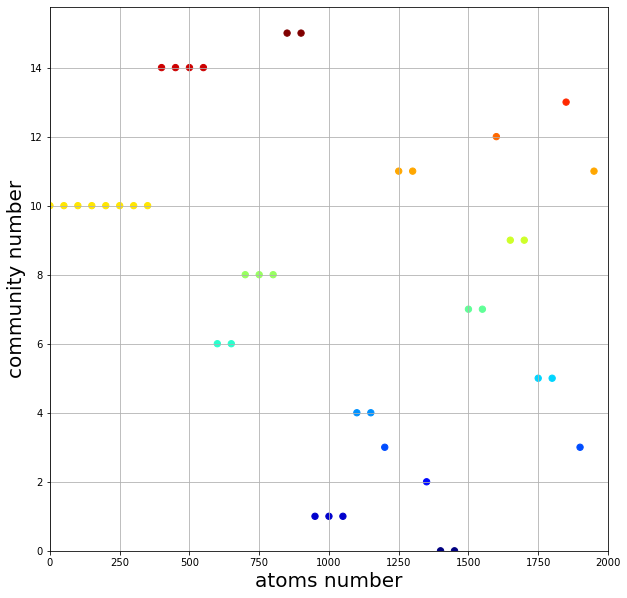

In [16]:
dot = []
community = []
clr = []
for j in range(len(XYZ_C_space)):
    if j % 50 == 0: #取40個原子作圖
        community.append(kmeans.labels_[j])
        dot.append(j)
        clr.append(labelK[j])
plt.figure(figsize=(10,10))
plt.scatter(dot, community, s=40, c =clr, cmap = plt.get_cmap('jet'))
plt.xlim(0,2000)
plt.xlabel("atoms number", fontsize=20)
plt.ylim(0, )
plt.ylabel("community number", fontsize=20)
plt.grid(True)
plt.show()